# Rank chart
 America's most popular sports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import rankdata

In [107]:
#load data
df = pd.read_excel("Data.xlsx")

#remove 'Other' category
df = df[df["Sport"]!='Other']

# create ranks
data = pd.melt(df, id_vars = "Sport", var_name="Year", value_name="Percent")
data["rank"] = data.groupby("Year")["Percent"].transform(lambda x: rankdata(-x))

#where multiple sports in rank, round down
data["rank"] = data["rank"].apply(np.floor)

#remove where rank less than 10
#data = data[data["rank"]<=8]
data = data[data["Sport"]!="No opinion"]

rename_sports = {"Ice/Figure skating": "Figure skating", "Track and field" : "Track & field"}
data["Sport"] = data["Sport"].replace(rename_sports)

In [108]:
data["Sport"].unique()

array(['Football', 'Basketball', 'Baseball', 'Soccer', 'Ice hockey',
       'Auto racing', 'Tennis', 'Golf', 'Volleyball', 'Boxing',
       'Gymnastics', 'Motocross', 'Figure skating', 'Rodeo',
       'Track & field', 'Fishing', 'Swimming', 'Wrestling', 'Bowling',
       'None'], dtype=object)

In [6]:
def add_label(x,y,label, fontsize, ax):
    PAD = 0.4
    ax.annotate(
        f"{label}: {int(y)}%", 
        xy=(x + PAD, y), 
        ha="left", 
        va="center",
        fontsize=fontsize,
        zorder=12,
        color="#111111"
    )

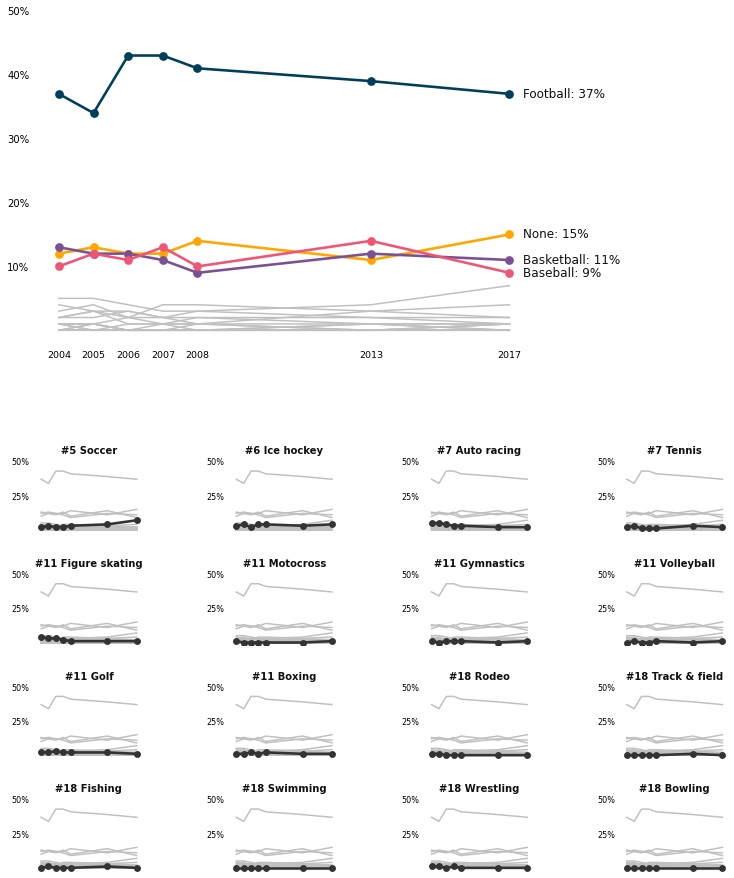

In [114]:

# =========
# Initialise Figure
fig = plt.figure(figsize=(10,12))

# Add axes objects of the size we want
ax  = plt.subplot2grid(shape=(2,4), loc=(0,0), colspan=3)
ax1 = fig.add_subplot(8,4,17)
ax2 = fig.add_subplot(8,4,18)
ax3 = fig.add_subplot(8,4,19)
ax4 = fig.add_subplot(8,4,20)
ax5 = fig.add_subplot(8,4,21)
ax6 = fig.add_subplot(8,4,22)
ax7 = fig.add_subplot(8,4,23)
ax8 = fig.add_subplot(8,4,24)
ax9 = fig.add_subplot(8,4,25)
ax10 = fig.add_subplot(8,4,26)
ax11 = fig.add_subplot(8,4,27)
ax12 = fig.add_subplot(8,4,28)
ax13 = fig.add_subplot(8,4,29)
ax14 = fig.add_subplot(8,4,30)
ax15 = fig.add_subplot(8,4,31)
ax16 = fig.add_subplot(8,4,32)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]


# =====
# plot data

SPORTS = data[data["Year"]==2017][["Sport", "rank"]].sort_values(by="rank")["Sport"].to_list()
colours = {'Football': "#003f5c", 'Basketball': "#7a5195", 'Baseball': "#ef5675", 'None':"#ffa600"}
other = "#C0C0C0"

# =====
# Create top chart
# Loop through countries
for sport in SPORTS:
    
    # Filter data to keep rows of the country
    d = data[data["Sport"] == sport] 
    x = d["Year"].values
    y = d["Percent"].values
    rank = d["rank"].values
    
    if sport in SPORTS[:4]:
        ax.plot(x, y, color=colours[sport], lw=2.6, zorder=10)
        ax.scatter(x, y, fc=colours[sport], ec=colours[sport], s=40, lw=2.4, zorder=12)   
        # Pass the first and last values to the add_label function
        add_label(x[0], y[0], sport, 12, ax)
    else:
        ax.plot(x, y, color=other)
        #ax.scatter(x, y, fc=other, ec=other, s=20, lw=2.4, zorder=12) 

        
# Remove vertical ticks
ax.set_yticks([0,10,20,30,40,50])
ax.set_yticklabels(["","10%","20%","30%","40%","50%"])

# Set location of horizontal ticks
ax.set_xticks([2004, 2005, 2006, 2007, 2008, 2013, 2017], )
ax.set_xticklabels([2004, 2005, 2006, 2007, 2008, 2013, 2017],fontsize=9.5)

# Remove tick marks in bottom horizontal axis
ax.tick_params(bottom=False, left=False)

# Remove the frame
ax.set_frame_on(False)

# ======
# Other sports

for i in range(len(axes)):
    
    #focus = SPORTS[3]
    
    for sport in SPORTS:
        
        # Filter data to keep rows of the country
        d = data[data["Sport"] == sport] 
        x = d["Year"].values
        y = d["Percent"].values
        rank = d["rank"].values
        
        if sport in SPORTS[i+4:i+5]:
            axes[i].plot(x, y, color="#333333", lw=2.6, zorder=10)
            axes[i].scatter(x, y, fc='#333333', ec='#333333', s=20, lw=2.4, zorder=12)   
            # Set title
            axes[i].set_title(f"#{int(rank[0])} {sport}", fontsize=10, fontweight='bold', color="#111111", y=1.02)
        else:
            axes[i].plot(x, y, color=other)
    
            
    # Remove vertical ticks
    axes[i].set_yticks([0,25, 50])
    axes[i].set_yticklabels(["","25%", "50%"], fontsize=8)
    
    # Set location of horizontal ticks
    axes[i].set_xticks([2004, 2005, 2006, 2007, 2008, 2013, 2017], )
    axes[i].set_xticklabels([],fontsize=9)
    
    # Remove tick marks in bottom horizontal axis
    axes[i].tick_params(bottom=False, left=False)
    
    # Remove the frame
    axes[i].set_frame_on(False)

#plt.tight_layout(h_pad=2)
plt.tight_layout(pad=0, w_pad=0, h_pad=1)
plt.show()

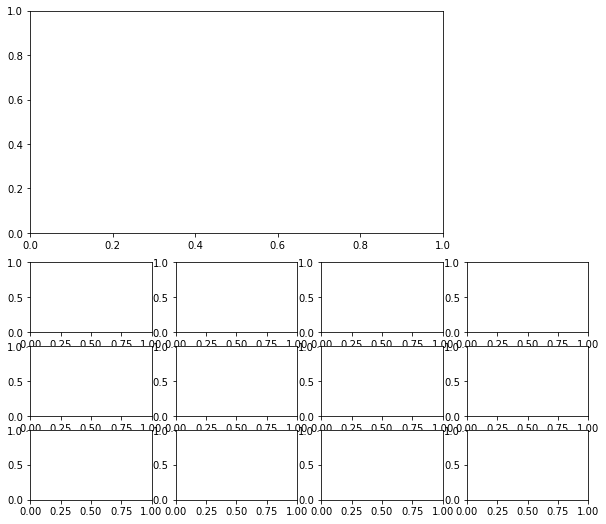

In [88]:
# Initialise Figure
fig = plt.figure(figsize=(10,9))

# Add axes objects of the size we want
ax  = plt.subplot2grid(shape=(2,4), loc=(0,0), colspan=3)
ax1 = fig.add_subplot(6,4,13)
ax2 = fig.add_subplot(6,4,14)
ax3 = fig.add_subplot(6,4,15)
ax4 = fig.add_subplot(6,4,16)
ax5 = fig.add_subplot(6,4,17)
ax6 = fig.add_subplot(6,4,18)
ax7 = fig.add_subplot(6,4,19)
ax8 = fig.add_subplot(6,4,20)
ax9 = fig.add_subplot(6,4,21)
ax10 = fig.add_subplot(6,4,22)
ax11 = fig.add_subplot(6,4,23)
ax12 = fig.add_subplot(6,4,24)

plt.show()

In [76]:
range(len(axes))

range(0, 12)

In [75]:
len(axes)

12

In [30]:
SPORTS[3]

'Soccer'

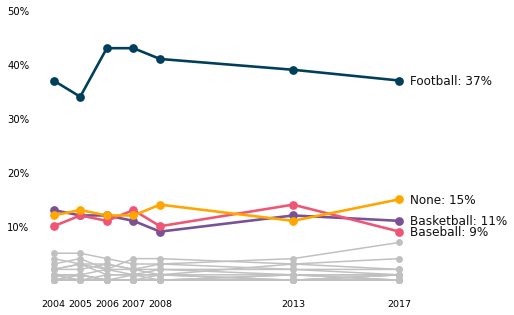

In [15]:
SPORTS = data["Sport"].unique()
SPORT = SPORTS[0]

top_four = ['Football', 'Basketball', 'Baseball', 'None']
colours = {'Football': "#003f5c", 'Basketball': "#7a5195", 'Baseball': "#ef5675", 'None':"#ffa600"}
other = "#C0C0C0"

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Invert vertical axis to show rank 1 on top
#ax.invert_yaxis()

ax = plt.subplot2grid(shape=(3, 2), loc=(1, 0), rowspan=2)

# Loop through countries
for sport in SPORTS:
    
    # Filter data to keep rows of the country
    d = data[data["Sport"] == sport] 
    x = d["Year"].values
    y = d["Percent"].values
    rank = d["rank"].values
    
    if sport in top_four:
        ax.plot(x, y, color=colours[sport], lw=2.6, zorder=10)
        ax.scatter(x, y, fc=colours[sport], ec=colours[sport], s=40, lw=2.4, zorder=12)   
        # Pass the first and last values to the add_label function
        add_label(x[0], y[0], sport, 12, ax)
    else:
        ax.plot(x, y, color=other)
        ax.scatter(x, y, fc=other, ec=other, s=20, lw=2.4, zorder=12) 

        
# Remove vertical ticks
ax.set_yticks([0,10,20,30,40,50])
ax.set_yticklabels(["","10%","20%","30%","40%","50%"])

# Set location of horizontal ticks
ax.set_xticks([2004, 2005, 2006, 2007, 2008, 2013, 2017], )
ax.set_xticklabels([2004, 2005, 2006, 2007, 2008, 2013, 2017],fontsize=9.5)

# Remove tick marks in bottom horizontal axis
ax.tick_params(bottom=False, left=False)

# Remove the frame
ax.set_frame_on(False)


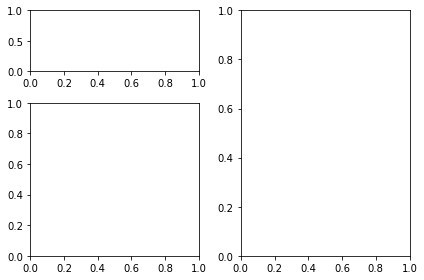

In [61]:
fig = plt.figure()
ax1 = fig.add_subplot(122)
ax2 = fig.add_subplot(321)
ax3 = plt.subplot2grid(shape=(3, 2), loc=(1, 0), rowspan=2)
plt.tight_layout()
plt.show()